# Student Details


In [504]:
# NAME: T. MOHAMED NADHIM
# REG. NO: 3122 21 3002 058
# YEAR & DEPT: 3RD YEAR / ECE - A
# ASSIGNMENT: IMPLEMENTATION OF TEACHING AND LEARNING ALGORITHM

In [505]:
#Architecture:

'''
    Teaching
    |
    v

    Learning
    |
    v

    Repeat

'''

'\n    Teaching\n    |\n    v\n\n    Learning\n    |\n    v\n\n    Repeat\n\n'

# Installing Libraries

In [506]:
# !pip install matplotlib

# Importing Libraries

In [507]:
import math, random
import matplotlib.pyplot as plt

# Defining functions for Griewank Fn, Generating population etc..

In [508]:
#Function to calculate the Griewank Function value for a given list
def griewank(x):

    l= len(x)
    sum_val = 0
    cos_prod = 1
    griewank_value = 0

    for i in range(l):
        sum_val += ((x[i]**2)/4000)
        cos_prod *=  math.cos(x[i]/math.sqrt(i+1))

    griewank_value = 1 + sum_val - cos_prod

    return griewank_value


In [509]:
#Generates a random population set based on the learner and subject length
def population_generator(learners, subjects, lower_bound, upper_bound):

    population = []

    for i in range(learners):
        learner = []
        for i in range(subjects):
            learner.append(round(random.uniform(lower_bound,upper_bound),4))
        population.append(learner)

    return population


In [510]:
#Calculates the mean value of each subject, given a population
def mean_of_subjects(population):

    mean_sub = []

    for i in range(subjects):
        mean = []
        for j in range(learners):
            mean.append(population[j][i])

        mean_sub.append(round(sum(mean)/len(mean),2))

    return mean_sub


In [511]:
#Calculates the objective function values, given a population
def obj_fn_val(population_data):

    obj_val = []

    for i in population_data:
        obj_val.append(round(griewank(i),4))

    return obj_val


In [512]:
#Generates random pairs for learners
def generate_pair(learners):

    pairs = []

    for i in range(learners):
        pairs.append(random.choice([i+1 for i in range(learners)]))

    return pairs

# Teaching Phase Function

In [513]:
#Teaching Phase
def teaching_phase(population, teacher_index):

    teaching_factor = round(1+ random.random()*2 -1) #Teaching Factor

    mean_subjects = mean_of_subjects(population) #Finding mean value for each subject

    random_num_teacher = [round(random.uniform(0,1),2) for i in range(subjects)] #Generating a random number for each subject

    diff_mean = []

    for i in range(subjects):
        diff = random_num_teacher[i]*(population[teacher_index][i] - (teaching_factor*mean_subjects[i])) # Finding Difference_mean
        diff_mean.append(round(diff,4))

    updated_population = population_generator(learners,subjects,lower_bound,upper_bound)


    #Updating the population by adding Diff_mean values
    for i in range(subjects):
        for j in range(learners):
            updated_population[j][i]= population[j][i] + diff_mean[i]
            updated_population[j][i] =  round(updated_population[j][i],4)


    #Finding the objective function values after updating population
    obj_fn_updated = obj_fn_val(updated_population)

    return updated_population, obj_fn_updated


# Learning Phase Function

In [514]:
#Learning Phase
def learning_phase(updated_population, obj_fn_updated):

    learner_updated_population = population_generator(learners,subjects,lower_bound,upper_bound) # type: ignore

    pair = generate_pair(learners) # type: ignore #Generating a learners pair for each learner
    random_num_learner = [round(random.uniform(0,1),2) for i in range(subjects)] #Generating a random number for each subject


    #Updating the population based on learner-learner interaction
    for i in range(learners):
        for j in range(subjects):
            learner_updated_population[i][j] = updated_population[i][j] + (random_num_learner[j]*(updated_population[pair[i]-1][j] - updated_population[i][j]))
            learner_updated_population[i][j] =  round(learner_updated_population[i][j],4)



    #Finding the objective function values after updating population
    obj_fn_learner = obj_fn_val(learner_updated_population)


    #Finding the index of the learner with the biggest reduce in objective function after updating the population
    new_teacher = int()
    ruff = []
    for i in range(len(objective_fn_values)):
        ruff.append(obj_fn_learner[i]-obj_fn_updated[i])
    new_teacher = ruff.index(min(ruff))

    return learner_updated_population, new_teacher, obj_fn_learner



# Application of Teaching and Learning Phases

In [515]:
learners = 3
subjects = 2
lower_bound = -600
upper_bound = 600

iterations = 200

population = population_generator(learners,subjects, lower_bound, upper_bound) #Generating the population

objective_fn_values = obj_fn_val(population) #Finding objective function values for the population

teacher = min(objective_fn_values)
teacher_index = objective_fn_values.index(teacher) #Finding the index of the objective function result with least value


#Printing the original population and objective function values
print('Original Population: ')
for i in population:
    print(i)

print()

print('Original Objective function values:')
print(objective_fn_values)

print()
print()
o_values_min = []
o_values_max = []

l1s1 = []
l1s2=[]

l2s1 = []
l2s2=[]

l3s1 = []
l3s2=[]
for i in range(iterations):

    updated_population, updated_objective_fn = teaching_phase(population,teacher_index)
    learner_updated_population, new_teacher, learner_updated_obj_fn = learning_phase(updated_population, updated_objective_fn)

    population, teacher_index = learner_updated_population, new_teacher

    #Updated Code for review
    if i <10:
      print()
      print(f"Updated Population after teaching phase for Iteration {i}")
      for j in range(len(updated_population)):
        print(f'Learner {j+1}',updated_population[j])
      print('Objective Function:')
      print(updated_objective_fn)
      #End of Updated Code


    o_values_min.append(min(learner_updated_obj_fn)) #Finding the minimum value of the updated objective function for each iteration
    o_values_max.append(max(learner_updated_obj_fn)) #Finding the minimum value of the updated objective function for each iteration

    l1s1.append(updated_population[0][0])
    l1s2.append(updated_population[0][1])

    l2s1.append(updated_population[1][0])
    l2s2.append(updated_population[1][1])

    l3s1.append(updated_population[2][0])
    l3s2.append(updated_population[2][1])



#Printing the Updated population and objective function values
print(f'Updated Population after {iterations} iterations: ')

for i in population:
    print(i)

print()

print(f'Updated Objective function values after {iterations} iterations: ')
print(learner_updated_obj_fn)



Original Population: 
[482.6192, 188.7799]
[-253.6676, 533.9587]
[599.0327, 194.7053]

Original Objective function values:
[68.1285, 88.9487, 100.6392]



Updated Population after teaching phase for Iteration 0
Learner 1 [546.6743, 115.0509]
Learner 2 [-189.6125, 460.2297]
Learner 3 [663.0878, 120.9763]
Objective Function:
[78.0764, 62.8213, 113.8453]

Updated Population after teaching phase for Iteration 1
Learner 1 [558.7917, 119.7095]
Learner 2 [163.585, 237.5885]
Learner 3 [628.6398, 121.6649]
Objective Function:
[83.5469, 21.8749, 103.8351]

Updated Population after teaching phase for Iteration 2
Learner 1 [340.1074, 132.2485]
Learner 2 [340.1074, 185.294]
Learner 3 [-55.0993, 197.9619]
Objective Function:
[33.7816, 38.0887, 11.5778]

Updated Population after teaching phase for Iteration 3
Learner 1 [334.7431, 13.8581]
Learner 2 [334.7431, 66.9036]
Learner 3 [-60.4636, 79.5715]
Objective Function:
[28.9098, 29.9723, 4.184]

Updated Population after teaching phase for Iteration 4
L

# Plotting graph - Obj Fn VS No. of Iterations

Text(0.5, 1.0, 'Learner Values Visualization')

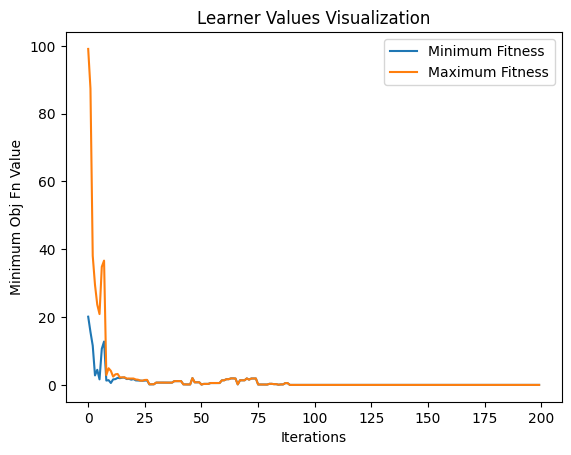

In [516]:
x = [i for i in range(iterations)]


#Generating a graph to find the difference between the obj fn values per each iteration
plt.plot(x,o_values_min, label="Minimum Fitness")
plt.plot(x,o_values_max, label="Maximum Fitness")
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Minimum Obj Fn Value')

plt.title('Learner Values Visualization')


Text(0.5, 1.0, 'Obj fn Values Vs. No. of Iterations')

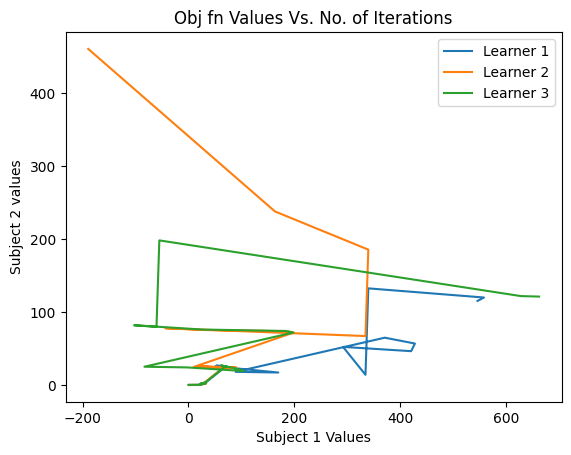

In [517]:
plt.plot(l1s1,l1s2, label="Learner 1")
plt.plot(l2s1,l2s2, label="Learner 2")
plt.plot(l3s1,l3s2, label="Learner 3")

plt.legend()
plt.xlabel('Subject 1 Values')
plt.ylabel('Subject 2 values')

plt.title('Obj fn Values Vs. No. of Iterations')